In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

df = pd.read_csv('gbm-data.csv')
df_np = df.to_numpy()
#df.head()

In [2]:
y = df_np[:, 0]
X = df_np[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

      Iter       Train Loss   Remaining Time 
         1           1.0190           34.11s
         2           0.9192           43.52s
         3           0.8272           41.58s
         4           0.7834           39.97s
         5           0.7109           37.48s
         6           0.6368           35.42s
         7           0.5797           34.26s
         8           0.5610           33.73s
         9           0.5185           33.15s
        10           0.4984           32.30s
        20           0.1999           30.89s
        30           0.1313           28.82s
        40           0.0790           28.62s
        50           0.0511           27.09s
        60           0.0352           27.77s
        70           0.0245           27.25s
        80           0.0162           25.92s
        90           0.0114           24.75s
       100           0.0077           23.07s
       200           0.0002            7.14s


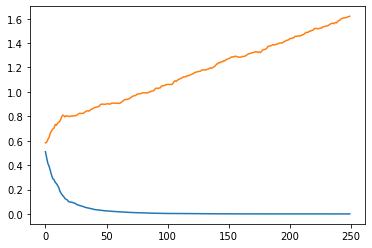

      Iter       Train Loss   Remaining Time 
         1           1.1255           52.54s
         2           1.0035           55.55s
         3           0.9386           48.99s
         4           0.8844           47.91s
         5           0.8381           44.20s
         6           0.7995           41.60s
         7           0.7559           40.20s
         8           0.7205           40.23s
         9           0.6958           39.18s
        10           0.6725           38.40s
        20           0.4672           34.83s
        30           0.3179           33.18s
        40           0.2274           32.20s
        50           0.1774           33.24s
        60           0.1394           32.46s
        70           0.1050           30.51s
        80           0.0805           28.36s
        90           0.0650           26.23s
       100           0.0511           23.83s
       200           0.0058            6.82s


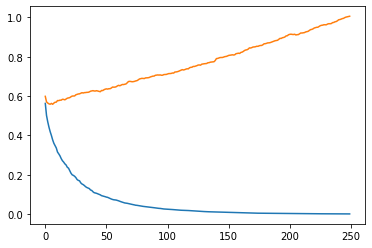

      Iter       Train Loss   Remaining Time 
         1           1.2095           47.06s
         2           1.1006           38.69s
         3           1.0240           35.16s
         4           0.9729           34.50s
         5           0.9387           33.22s
         6           0.8948           32.90s
         7           0.8621           39.29s
         8           0.8360           38.68s
         9           0.8171           41.52s
        10           0.7883           44.67s
        20           0.6029           40.58s
        30           0.4760           39.67s
        40           0.3879           38.15s
        50           0.3325           36.91s
        60           0.2759           34.15s
        70           0.2304           31.09s
        80           0.1969           28.26s
        90           0.1718           25.73s
       100           0.1404           23.48s
       200           0.0358            7.53s


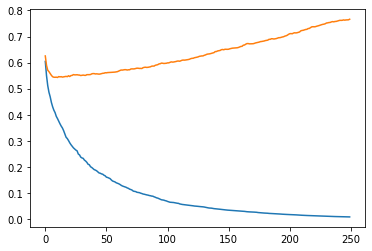

      Iter       Train Loss   Remaining Time 
         1           1.2613           36.35s
         2           1.1715           36.46s
         3           1.1009           32.94s
         4           1.0529           31.18s
         5           1.0130           30.38s
         6           0.9740           29.49s
         7           0.9475           29.02s
         8           0.9197           28.92s
         9           0.8979           28.57s
        10           0.8730           28.66s
        20           0.7207           27.27s
        30           0.6055           26.18s
        40           0.5244           25.20s
        50           0.4501           24.31s
        60           0.3908           23.02s
        70           0.3372           21.80s
        80           0.3009           20.59s
        90           0.2603           19.30s
       100           0.2327           18.26s
       200           0.0835            5.91s


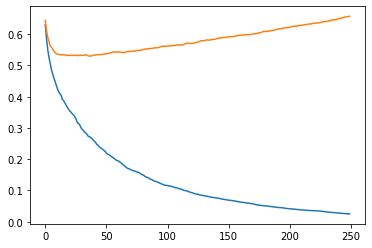

      Iter       Train Loss   Remaining Time 
         1           1.3199           34.87s
         2           1.2645           32.62s
         3           1.2170           30.87s
         4           1.1775           30.01s
         5           1.1404           29.60s
         6           1.1106           28.92s
         7           1.0844           28.64s
         8           1.0617           28.92s
         9           1.0411           30.13s
        10           1.0223           30.58s
        20           0.8864           27.45s
        30           0.7844           26.25s
        40           0.7176           24.97s
        50           0.6590           23.87s
        60           0.6120           23.05s
        70           0.5599           22.00s
        80           0.5242           20.68s
        90           0.4829           19.51s
       100           0.4473           18.26s
       200           0.2379            5.89s


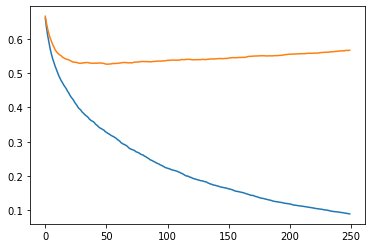

In [3]:
def sigmoid(y):
    import numpy as np
    return 1/(1+np.exp(-y))

def log_loss_func(X, y, clf):
    loss = []
    for ii in clf.staged_decision_function(X):
        loss.append(log_loss(y, sigmoid(ii)))
    return loss

lr = [1, 0.5, 0.3, 0.2, 0.1]
min_loss_arr = []; min_ind_arr = []
for rate in lr:
    clf = GradientBoostingClassifier(n_estimators=250, verbose=True, learning_rate=rate, random_state=241)
    clf.fit(X_train, y_train)

    train_loss = log_loss_func(X_train, y_train, clf)
    test_loss = log_loss_func(X_test, y_test, clf)

    min_loss = min(test_loss); min_loss_arr.append(min_loss)
    min_ind = test_loss.index(min_loss)+1; min_ind_arr.append(min_ind)

    plt.figure()
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.show()

In [16]:
forest = RandomForestClassifier(n_estimators=37, random_state=241)
forest.fit(X_train, y_train)

prediction = forest.predict_proba(X_test)
log_loss(y_test, prediction[:, 1])

0.5410941951182815